# Quantum Permutation Pad with Qiskit Runtime by Alain Chancé

## MIT License

Copyright (c) 2022 Alain Chancé

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

## Abstract
Abstract— We demonstrate an efficient implementation of the Kuang and Barbeau’s Quantum Permutation pad (QPP) symmetric cryptographic algorithm with Qiskit Runtime, a new architecture offered by IBM Quantum that streamlines quantum computations. We have implemented a Python class QPP and template Jupyter notebooks with Qiskit code for encrypting and decrypting with n-qubit QPP any text file in UTF-16 format or any image file in .png format. We offer the option of running either a quantum circuit with $n$ qubits, or an alternate one with $2^n$ qubits which only uses swap gates and has a circuit depth of $O(n)$. It is inherently extremely fast and could be run efficiently on currently available noisy quantum computers. Our implementation leverages the new Qiskit Sampler primitive in localized mode which dramatically improves performance. We offer a highly efficient classical implementation which performs permutation gate matrix multiplication with information state vectors. We illustrate the use with two agents Alice and Bob who exchange a text file and an image file using 2-qubit QPP and 4-qubit QPP. 

Keywords—quantum communication, quantum encryption,
quantum decryption, quantum security, secure communication, QPP, Qiskit, IBMQ

## Credit: Kuang, R., Perepechaenko

Appendix, source code for the implementation of the 2-qubits QPP of the following article:

Kuang, R., Perepechaenko, M. Quantum encryption with quantum permutation pad in IBMQ systems. EPJ Quantum Technol. 9, 26 (2022). https://doi.org/10.1140/epjqt/s40507-022-00145-y 

## Rights and permissions
$\textbf{Open Access}$ This article is licensed under a Creative Commons Attribution 4.0 International License, which permits use, sharing, adaptation, distribution and reproduction in any medium or format, as long as you give appropriate credit to the original author(s) and the source, provide a link to the Creative Commons licence, and indicate if changes were made. The images or other third party material in this article are included in the article’s Creative Commons licence, unless indicated otherwise in a credit line to the material. If material is not included in the article’s Creative Commons licence and your intended use is not permitted by statutory regulation or exceeds the permitted use, you will need to obtain permission directly from the copyright holder. To view a copy of this licence, visit http://creativecommons.org/licenses/by/4.0/.

# Adaptations made by Alain Chancé

# Summary of updates V4
This Jupyter notebook has been updated to work with Python 3.12 and the following Qiskit versions:
- Qiskit v1.3, Qiskit runtime version: 0.34, Qiskit Aer 0.16
- Qiskit v2.0, Qiskit runtime version: 0.37, Qiskit Aer 0.17

Please refer to the following documentation:
- Qiskit v2.0 migration guide, https://docs.quantum.ibm.com/migration-guides/qiskit-2.0
- Qiskit Aer documentation, https://qiskit.github.io/qiskit-aer/
- Qiskit Aer 0.16.1, Getting started, https://qiskit.github.io/qiskit-aer/getting_started.html
- Qiskit Aer 0.16.1, Simulators, https://qiskit.github.io/qiskit-aer/tutorials/1_aersimulator.html

## Updates in code
In class QPP

Removed "U0" in basis_gates to solve the following issue:

Providing non-standard gates (u0) through the ``basis_gates`` argument is not allowed. Use the ``target`` parameter instead.
You can build a target instance using ``Target.from_configuration()`` and provide custom gate definitions with the ``custom_name_mapping`` argument.
```
basis_gates=["u3","u2","u1","cx","id","u","p","x","y","z","h","s",
                 "sdg","t","tdg","rx","ry","rz","sx","sxdg","cz","cy","swap",
                "ch","ccx","cswap","crx","cry","crz","cu1","cp","cu3","csx",
                "cu","rxx","rzz"]
```
New
```
        # https://docs.quantum.ibm.com/migration-guides/local-simulators#aersimulator
        self.backend = AerSimulator(method='statevector')
        if trace > 0:
            print("\nbackend = AerSimulator(method='statevector')", file=trace_f)
            print("\nbackend = AerSimulator(method='statevector')")

        self.sampler = StatevectorSampler()
        
        # https://docs.quantum.ibm.com/migration-guides/local-simulators#aersimulator
        self.pm = generate_preset_pass_manager(backend=self.backend, optimization_level=opt_level)
```
### Updates in permutation_pad() function
New
```
        if do_sampler:
            # Create a session constructor using Qiskit Runtime Session()
            # https://docs.quantum.ibm.com/migration-guides/local-simulators#aersimulator
                with Session(backend=self.backend) as session:
                    sampler = self.sampler
```
New
```
                        if version == "V0":
                        # Apply permutation
                            qc.append(Operator(my_matrix), range(N))
                            qc.barrier()
                            qc = self.pm.run(qc)
```
New
```
                            qci = self.pm.run(qci)
                            job = self.backend.run([qci], shots=1024)
```

# Summary of updates V3
Summary of updates V3
This jupyter notebook has been updated to work with Qiskit 1.3.1 

## Updates in Install statements
Previously
```
from qiskit.primitives import Sampler
```
New
```
from qiskit.primitives import StatevectorSampler
```

## Updates in code
In class QPP

Commented out the options:
```
 #options = Options(resilience_level=resilience_level)
```

Previously
```
sampler = Sampler()
```
New
```
sampler = StatevectorSampler()
```
 
 Updated the with Sesssion according to the example given in the Session documentation:
 https://docs.quantum.ibm.com/api/qiskit-ibm-runtime/qiskit_ibm_runtime.Session
```
 with Session(backend=backend) as session:
```

# Summary of updates V2
This jupyter notebook has been updated to work with Qiskit 1.0.2. 

Please refer to the following documentation:
- Qiskit 1.0 feature changes, https://docs.quantum.ibm.com/api/migration-guides/qiskit-1.0-features#qiskit-10-feature-changes
- Qiskit 1.0 migration tool, https://docs.quantum.ibm.com/api/migration-guides/qiskit-1.0-features#qiskit-10-migration-tool
- Qiskit Aer 0.14.0.1, Getting started, https://qiskit.github.io/qiskit-aer/getting_started.html
- Migrate setup from qiskit-ibmq-provider, https://docs.quantum.ibm.com/api/migration-guides/qiskit-runtime#migrate-setup-from-qiskit-ibmq-provider
- Simulators, The AerSimulator, https://qiskit.github.io/qiskit-aer/tutorials/1_aersimulator.html

## Updates in install statements
### Install qiskit.aer
New
```
https://qiskit.github.io/qiskit-aer/getting_started.html
pip install qiskit_aer
```
## Updates in import statements
### Import qiskit.aer
Additional circuit methods. On import, Aer adds several simulation-specific methods to QuantumCircuit for convenience. These methods are not available until Aer is imported (import qiskit_aer). https://qiskit.github.io/qiskit-aer/apidocs/circuit.html
New
```
import qiskit_aer
```
### Import AerSimulator
New
```
from qiskit_aer import AerSimulator
```
### Migrate setup from qiskit-ibmq-provider
Previously
```
from qiskit import IBMQ
```
New
```
from qiskit_ibm_runtime import QiskitRuntimeService
```
## Updates in code
New
```
self.aer_sim = AerSimulator(method='statevector')
```
### Updates in permutation_pad() function
Previously
```
for i in range(2**num_of_qubits):
    ...
    # Append qci to the list perm_qc
    perm_qc.append(qci)

# Submit a job with all quantum circuits in perm_qc
job = sampler.run(circuits=perm_qc)
result = job.result()
```
New
```
qci = transpile(qci, self.aer_sim)
job = self.aer_sim.run(qci, shots=1024)
result = job.result()
counts = result.get_counts(qci)
                            
if version == "V0":
    # Get dictionary key with the max value
    maxkey = max(counts, key=counts.get)
    most_frequent = maxkey
    pdict[i] = most_frequent
                            
    if trace > 1:
        print("permutation_pad - k: {}, most_frequent: {}".format(k, most_frequent))
                            
else:  # Version V1
    # Get dictionary key with the max value
    maxkey = max(counts, key=counts.get)
    ix = n - maxkey.index('1') - 1
    most_frequent = eval("format(ix, '0" + str(num_of_qubits) + "b')")
    pdict[i] = most_frequent
    
    if trace > 1:
        print("permutation_pad - k: {}, maxkey: {}, string: {}, ix: {}, most_frequent: {}".
        format(k, maxkey, string, ix, most_frequent))
```

# Summary of updates V1
Please refer to the following documentation:

[3] Introducing new Qiskit Runtime capabilities — and how our clients are integrating them into their use, https://research.ibm.com/blog/qiskit-runtime-capabilities-integration

[4] Qiskit Runtime IBM Client, https://github.com/Qiskit/qiskit-ibm-runtime

[5] Qiskit IBM runtime, Configure error mitigation, Advanced resilience options, https://github.com/Qiskit/qiskit-ibm-runtime/blob/ab7486d6837652d54cb60b83cfaa9165f5d0484c/docs/how_to/error-mitigation.rst#advanced-resilience-options

### New class QPP
```
class QPP:
    def __init__(self, QPP_param_file = "QPP_param.json"):
```

### New import statements

#### Import array_to_latex to display matrices using laTeX
```
from qiskit.visualization import array_to_latex
```

#### Import time, datetime
```
import time, datetime
```

#### Import psutil
```
import psutil
```

#### Import the JSON package
```
import json
```

#### Import Bitstream, BitArray https://bitstring.readthedocs.io/en/stable/
```
from bitstring import BitStream, BitArray
```

#### Import QiskitRuntimeService, Session, Options and Sampler
```
from qiskit_ibm_runtime import QiskitRuntimeService, Session, Options

# Uncomment the following import to import the Qiskit Runtime Sampler
#from qiskit_ibm_runtime import Sampler

# This version uses the localized version of the `Sampler` which resides in Qiskit Terra [7][8]
# and uses the statevector simulator to compute probabilities
# probabilities = [
#       Statevector(bound_circuit_to_instruction(circ)).probabilities(qargs=qargs)
#      for circ, qargs in zip(bound_circuits, qargs_list)]
from qiskit.primitives import Sampler
```

### New method rand_key() to create a random binary string
```
# Function to create a random binary string
# https://www.geeksforgeeks.org/python-program-to-generate-random-binary-string/
    def rand_key(self, p):
   
        # Variable to store the string
        key1 = ""
 
        # Loop to find the string of desired length
        for i in range(p):
         
            # randint function to generate 0, 1 randomly and converting the result into str
            temp = str(randint(0, 1))
 
            # Concatenation the random 0, 1 to the final result
            key1 += temp
    
        return(key1)
```

### New method randomize() with added new parameters key_chunks, qc, qr, num_of_perm, transpose
```
    ##############################################################################################################
    # Define randomize() function to perform Fisher Yates shuffling                                              #
    # The Fisher–Yates shuffle is an algorithm for generating a random permutation of a finite sequence [5].     #
    ##############################################################################################################
    def randomize(self, arr, n, key_chunks, qc, qr, num_of_perm, transpose=False):
```

### New method permutation_pad() sets up a permutation quantum circuit and transpose
```
    ##############################################################################################################
    # Define permutation_pad() function                                                                          #
    # The Fisher–Yates shuffle is an algorithm for generating a random permutation of a finite sequence [5].     #
    ##############################################################################################################
    def permutation_pad(self, secret_key_blocks, transpose=False):
```

### New method encrypt() to encrypt a message leverages Qiskit Runtime primitives
```
    ##############################################################################################################
    # Define the function encrypt() to encrypt a message                                                         #
    ##############################################################################################################
    def encrypt(self, message=None):
```

### New method decrypt() to decrypt a ciphertext leverages Qiskit Runtime primitives
```
    ##############################################################################################################
    # Define the function decrypt() to decrypt a message                                                         #
    ##############################################################################################################
     def decrypt(self, ciphertext=None):
```

### New method file_to_bitstring() to convert plaintext file into a bitstring message
```
    ###############################################################################################################
    # Define function file_to_bitstring() to convert plaintext file into a bitstring message                      #
    ###############################################################################################################
    def file_to_bitstring(self):
```

### New method ciphertext_to_binary() to convert ciphertext into binary and save it into a binary file
```
    ###############################################################################################################
    # Define function ciphertext_to_binary() to convert ciphertext into binary and save it into a binary file     #
    ###############################################################################################################
    def ciphertext_to_binary(self, ciphertext=None):
```

### New method bitstring_to_file() to convert a decrypted message and save it into a decrypted file
```
    ###############################################################################################################
    # Define function bitstring_to_file() to convert a decrypted message and save it into a decrypted file        #
    ###############################################################################################################
    def bitstring_to_file(self, decrypted_message=None):
```

## Install Qiskit IBM Runtime

In [1]:
# https://github.com/Qiskit/qiskit-ibm-runtime
!pip install qiskit-ibm-runtime

### Install Qiskit Aer with the following command:
https://qiskit.github.io/qiskit-aer/getting_started.html

Additional circuit methods. On import, Aer adds several simulation-specific methods to QuantumCircuit for convenience. These methods are not available until Aer is imported (import qiskit_aer).

In [2]:
pip install qiskit-aer

Note: you may need to restart the kernel to use updated packages.


### Install bitstring 
Bitstring is a pure Python module that makes the creation, manipulation and analysis of binary data as simple and natural as possible. https://bitstring.readthedocs.io/en/stable/

In [3]:
pip install bitstring

Note: you may need to restart the kernel to use updated packages.


## Import statements

If "from QPP_Alain import QPP" fails and file QPP_Alain.py is in the same directory as your python or Jupyter notebook, try adding the following lines:
```
import sys
import os
cwd = os.getcwd()
_= (sys.path.append(cwd))
```

In [4]:
from QPP_Alain import QPP

Quantum permutation Pad with Qiskit Runtime by Alain Chancé

MIT License
Copyright (c) 2022 Alain Chancé
Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONT

## Create a parameter json file

In [5]:
%run 'Write json file.ipynb'

## Create an instance of the QPP class

In [6]:
Bob_QPP = QPP("QPP_param_4-qubits_V0_Christmas_tree")


Parameters read from file: QPP_param_4-qubits_V0_Christmas_tree.json
{'num_of_bits': 384, 'num_of_qubits': 4, 'num_of_perm_in_pad': 6, 'pad_selection_key_size': 6, 'opt_level': 2, 'resilience_level': 1, 'plaintext_file': 'Christmas_tree.png', 'token_file': 'Token_Alain.txt', 'trace': 1, 'job_trigger': 10000, 'print_trigger': 10000, 'draw_circuit': 'True', 'do_sampler': 'True', 'version': 'V0', 'len_message': 12758, 'len_ciphertext': 102064}
Printing trace into file:  Trace_Christmas_tree.txt

backend = AerSimulator(method='statevector')


## QPP decryption

### Read ciphertext binary file and extract the content to be transformed into a binary string

In [7]:
ciphertext = Bob_QPP.binary_to_ciphertext()

### Decrypt the ciphertext


decrypt - Length of cipher text in bits retrieved from param dictionary: 102064

decrypt - First 192 bits in ciphertext string
111101010110110111110111110111011011110110000010001010000101101010000011110111011011110010111011010000000010000111110111001000011001000001000110000011010101110001100010111101100011011010011010

permutation pad - Permutation number: 0, matrix: 


<IPython.core.display.Latex object>


permutation pad - Permutation number: 0, Depth of quantum circuit: 1


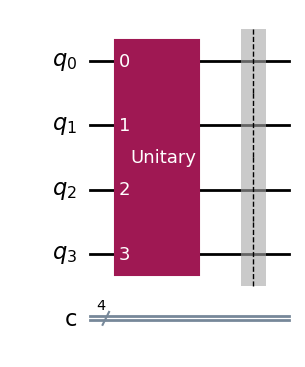


permutation_pad - permutation number: 0, dictionary:
{0: '0010', 1: '0111', 2: '0000', 3: '1011', 4: '0110', 5: '0011', 6: '0101', 7: '1111', 8: '0100', 9: '1001', 10: '1010', 11: '0001', 12: '1110', 13: '1000', 14: '1100', 15: '1101'}
permutation pad - Elapsed time: 0:00:00.626067

permutation pad - Permutation number: 1, matrix: 


<IPython.core.display.Latex object>


permutation pad - Permutation number: 1, Depth of quantum circuit: 1


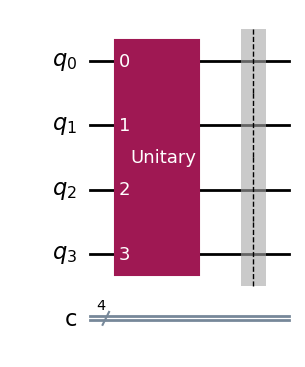


permutation_pad - permutation number: 1, dictionary:
{0: '1101', 1: '0110', 2: '0100', 3: '0000', 4: '0010', 5: '0111', 6: '0011', 7: '0101', 8: '1010', 9: '1100', 10: '1111', 11: '1001', 12: '1011', 13: '0001', 14: '1110', 15: '1000'}
permutation pad - Elapsed time: 0:00:00.807074

permutation pad - Permutation number: 2, matrix: 


<IPython.core.display.Latex object>


permutation pad - Permutation number: 2, Depth of quantum circuit: 1


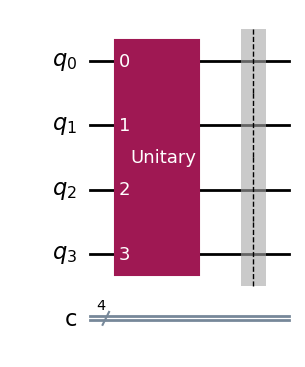


permutation_pad - permutation number: 2, dictionary:
{0: '0000', 1: '0001', 2: '1011', 3: '1111', 4: '0110', 5: '1100', 6: '1101', 7: '0101', 8: '0010', 9: '1001', 10: '0111', 11: '0011', 12: '1010', 13: '0100', 14: '1000', 15: '1110'}
permutation pad - Elapsed time: 0:00:00.992641

permutation pad - Permutation number: 3, matrix: 


<IPython.core.display.Latex object>


permutation pad - Permutation number: 3, Depth of quantum circuit: 1


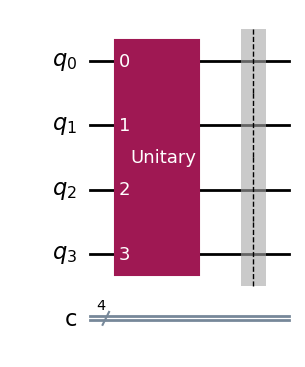


permutation_pad - permutation number: 3, dictionary:
{0: '0000', 1: '0100', 2: '1001', 3: '0111', 4: '1000', 5: '0011', 6: '1011', 7: '1101', 8: '0010', 9: '0101', 10: '1111', 11: '1010', 12: '1110', 13: '0001', 14: '0110', 15: '1100'}
permutation pad - Elapsed time: 0:00:01.176599

permutation pad - Permutation number: 4, matrix: 


<IPython.core.display.Latex object>


permutation pad - Permutation number: 4, Depth of quantum circuit: 1


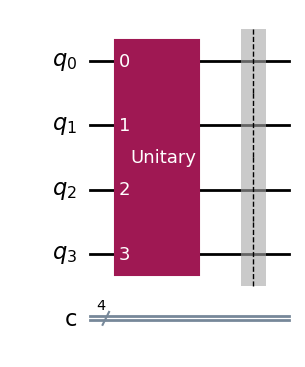


permutation_pad - permutation number: 4, dictionary:
{0: '1111', 1: '0001', 2: '1011', 3: '0101', 4: '1101', 5: '1000', 6: '1110', 7: '1010', 8: '1100', 9: '0011', 10: '0111', 11: '0000', 12: '0100', 13: '0110', 14: '1001', 15: '0010'}
permutation pad - Elapsed time: 0:00:01.321280

permutation pad - Permutation number: 5, matrix: 


<IPython.core.display.Latex object>


permutation pad - Permutation number: 5, Depth of quantum circuit: 1


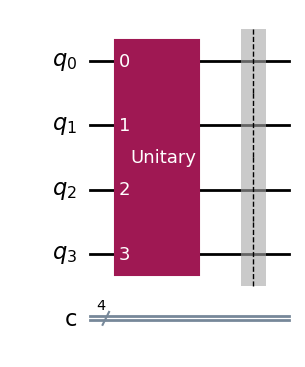


permutation_pad - permutation number: 5, dictionary:
{0: '1001', 1: '0110', 2: '1110', 3: '1000', 4: '1011', 5: '0111', 6: '0010', 7: '0001', 8: '0100', 9: '0011', 10: '0101', 11: '1101', 12: '1111', 13: '0000', 14: '1010', 15: '1100'}
permutation pad - Elapsed time: 0:00:01.485711
permutation pad - Length of Permutation_Pad: 6

decrypt - Length of ciphertext: 102064
decrypt - Remainder of dividing (Length of cipher chunks) by (Job trigger): 5516

decrypt - x : 9999,  Permutation_Pad[2], State vector: 1000, Most frequent: 0010
decrypt - Elapsed time for decryption: 0:00:00.002094
decrypt - x : 19999,  Permutation_Pad[5], State vector: 0101, Most frequent: 0111
decrypt - Elapsed time for decryption: 0:00:00.004048

decrypt - Length of decrypted message in bits: 102064

decrypt - Elapsed time for decryption of ciphertext: 0:00:00.030098


In [8]:
decrypted_message = Bob_QPP.decrypt(ciphertext=ciphertext)

### Convert the decrypted message and save it into the decrypted file

In [9]:
Bob_QPP.bitstring_to_file(decrypted_message=decrypted_message)


bitstring_to_file - decrypted message in bytes trimmed to true length: 12758


## References

[1] Kuang, Randy. Quantum Permutation Pad for Quantum Secure Symmetric and Asymmetric Cryptography. Vol. 2, no. 1, Academia Quantum, 2025. https://doi.org/10.20935/AcadQuant7457 

[2] Chancé, A. (2024). Quantum Permutation Pad with Qiskit Runtime. In: Femmam, S., Lorenz, P. (eds) Recent Advances in Communication Networks and Embedded Systems. ICCNT 2022. Lecture Notes on Data Engineering and Communications Technologies, vol 205. Springer, Cham. https://doi.org/10.1007/978-3-031-59619-3_12 

[3] R. Kuang and N. Bettenburg, 'Shannon perfect secrecy in a discrete Hilbert space', in Proc. IEEE Int. Conf. Quantum Comput. Eng. (QCE), Oct. 2020, pp. 249-255, doi: 10.1109/QCE49297.2020.00039

[4] Kuang, R., Perepechaenko, M. Quantum encryption with quantum permutation pad in IBMQ systems. EPJ Quantum Technol. 9, 26 (2022). https://doi.org/10.1140/epjqt/s40507-022-00145-y

[5] Qiskit Runtime overview, IBM Quantum, https://cloud.ibm.com/docs/quantum-computing?topic=quantum-computing-overview, https://cloud.ibm.com/docs/quantum-computing?topic=quantum-computing-overview

[6] QiskitRuntimeService, https://docs.quantum.ibm.com/api/qiskit-ibm-runtime/qiskit_ibm_runtime.QiskitRuntimeService#qiskitruntimeservice

## Print Qiskit version

In [10]:
import qiskit

In [11]:
print(qiskit.__version__)

2.0.0


## Print Qiskit Aer version

In [12]:
import qiskit_aer

In [13]:
print(qiskit_aer.__version__)

0.17.0


## Show Python version

In [14]:
%%bash
which python
python --version

/home/alain/miniconda3/bin/python
Python 3.12.9
